In [67]:
import pandas as pd
from usp_stream_datasets import *

import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15, 15))


pd.set_option('mode.use_inf_as_na', True)

dataset = "Incremental-gradual (imbal.)"

## FOR REFERENCE
# "Incremental-gradual (imbal.)": {
#     "change_point": [58159],
#     "filename": "INSECTS-gradual_imbalanced_norm.arff",
# }

df_data = load_insect_dataset(insects_datasets[dataset]["filename"])
species = b"ae-aegypti-female"
df_aedes = df_data[df_data["class"] == species]
df = df_aedes
df= df.reset_index(drop=True)

<Figure size 1500x1500 with 0 Axes>

In [51]:
df.shape

(30231, 34)

In [65]:
import random
from river import drift

def att_adwin(att_col):
    adwin = drift.ADWIN()
    change_indexes = []
    data_stream = df[att_col].tolist()
    # Update drift detector and verify if change is detected
    for i, val in enumerate(data_stream):
        _ = adwin.update(val)
        if adwin.drift_detected:
            # print(f"Change detected at index {i}, input value: {val}")
            change_indexes.append(i)
    ax = sns.lineplot(data=df[att_col])
    ax.set_title(f'ADWIN for {att_col}')
    x = ax.lines[0].get_xdata()
    y = ax.lines[0].get_ydata()
    
    for change_index in change_indexes:
        plt.axvline(x[change_index], color='red')



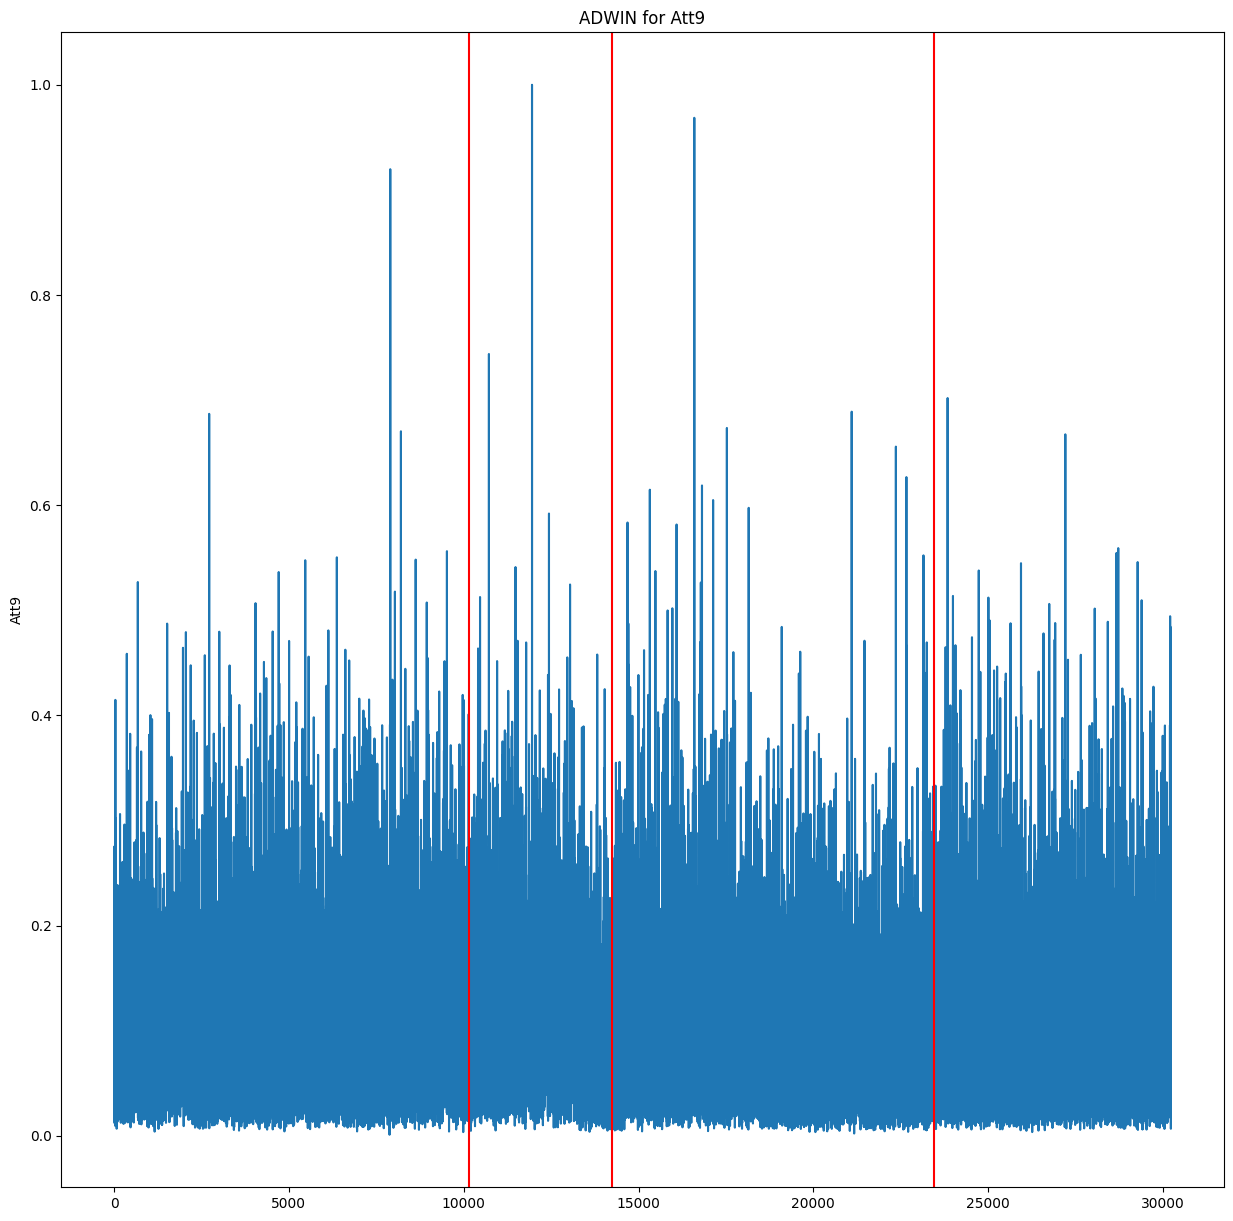

In [77]:
fig=plt.figure(figsize=(15, 15))
att_adwin("Att9")

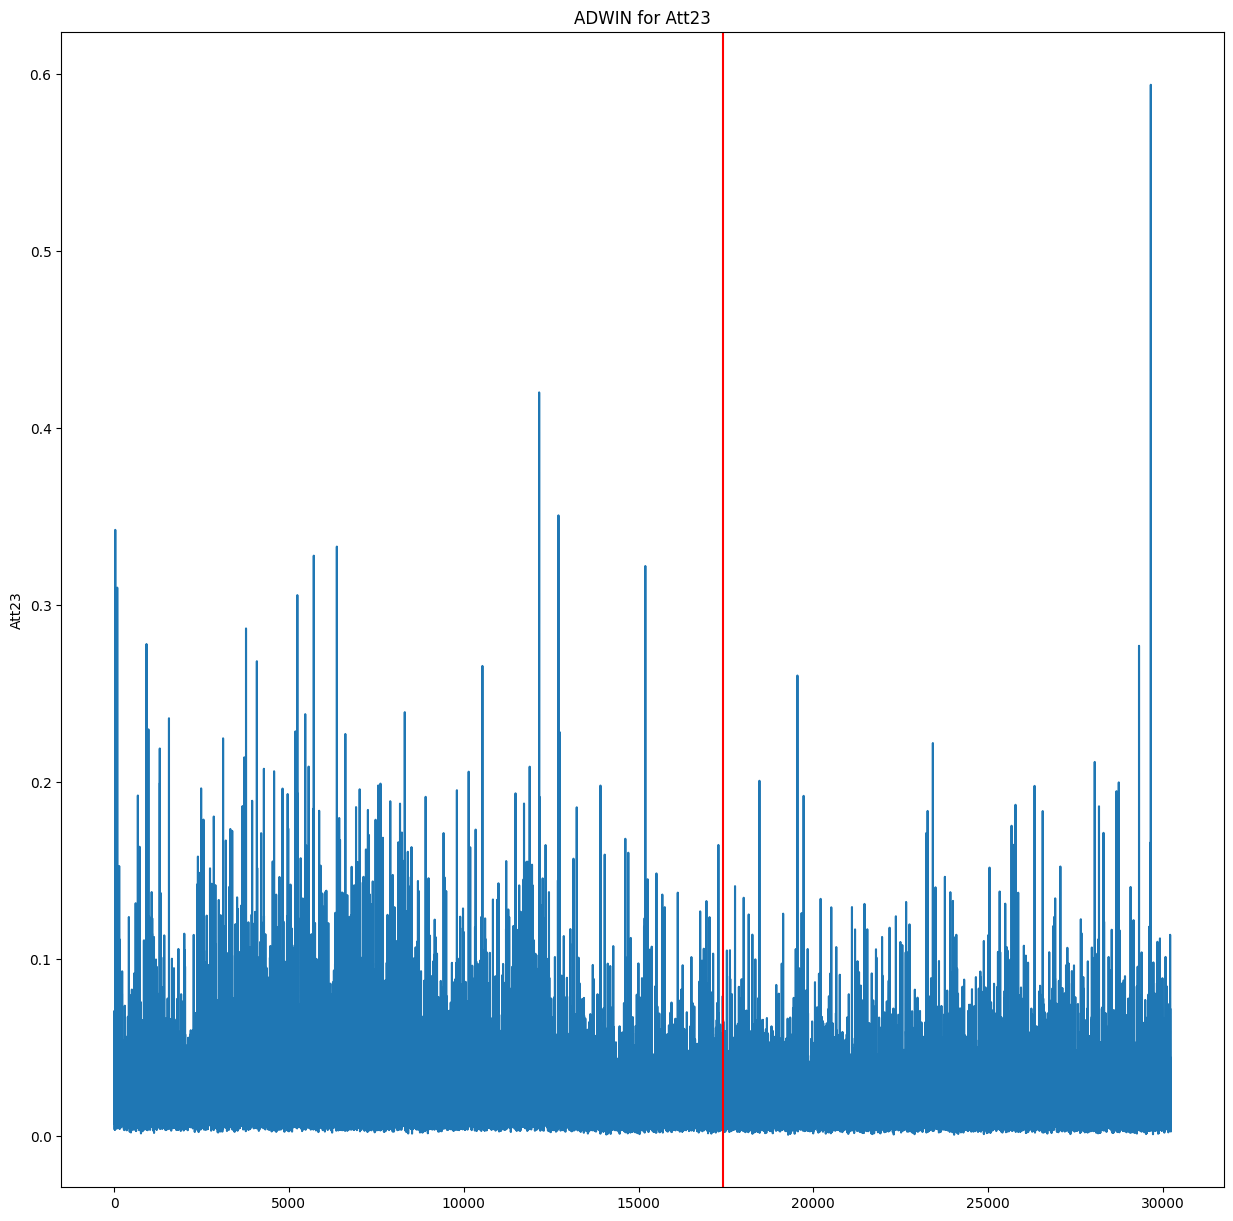

In [78]:
fig=plt.figure(figsize=(15, 15))
att_adwin("Att23")

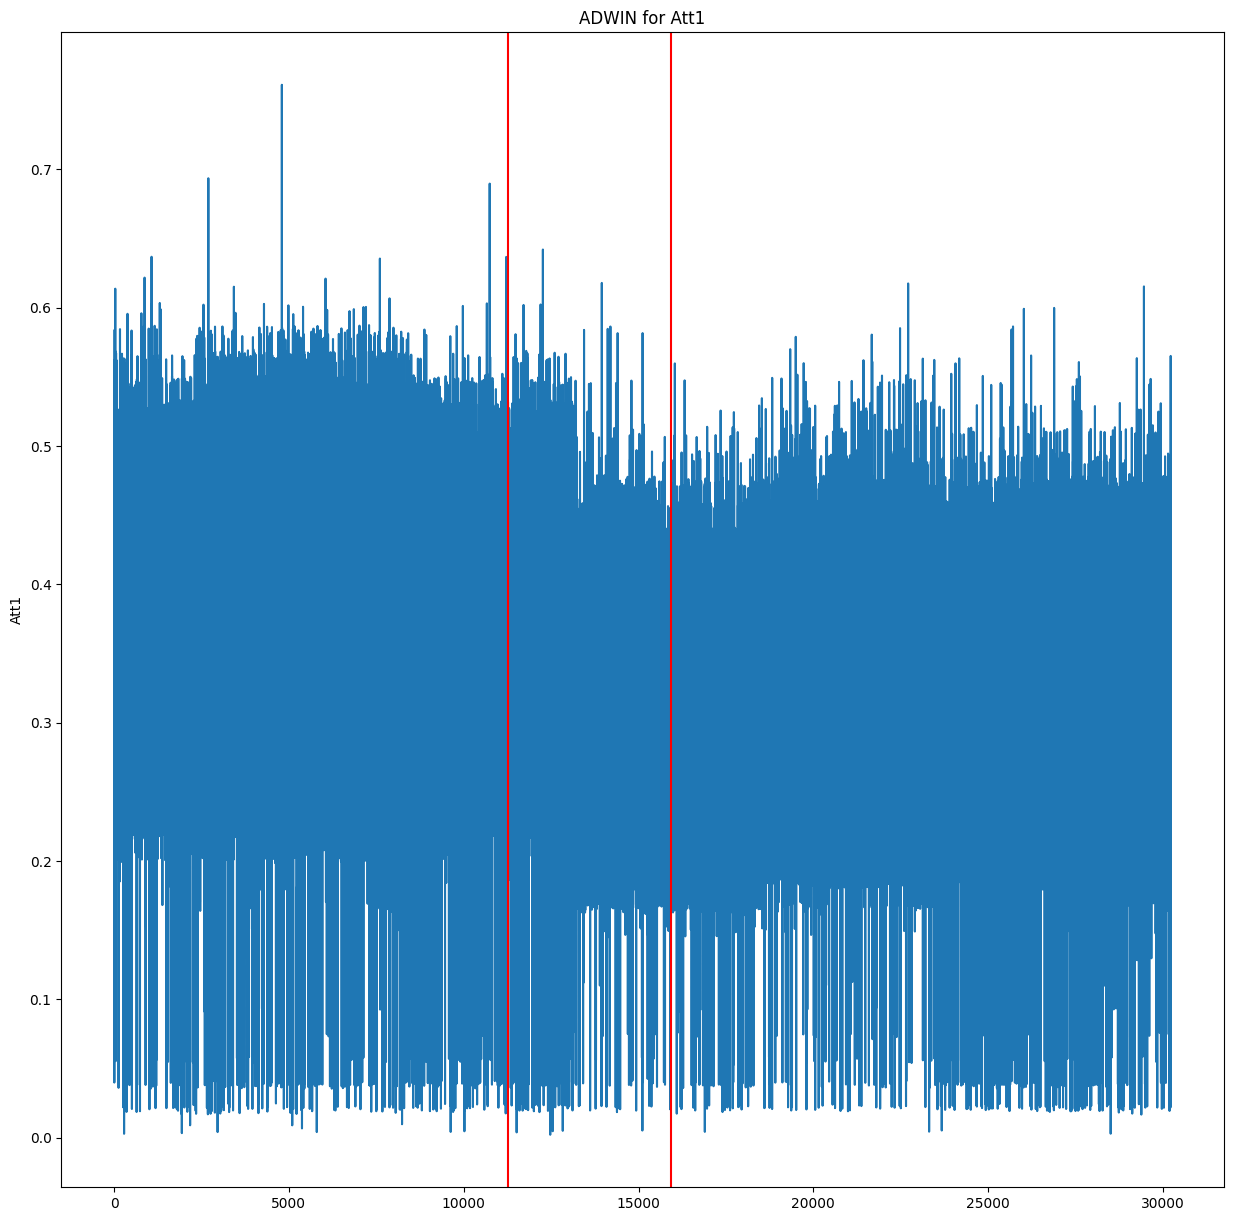

In [79]:
fig=plt.figure(figsize=(15, 15))
att_adwin("Att1")

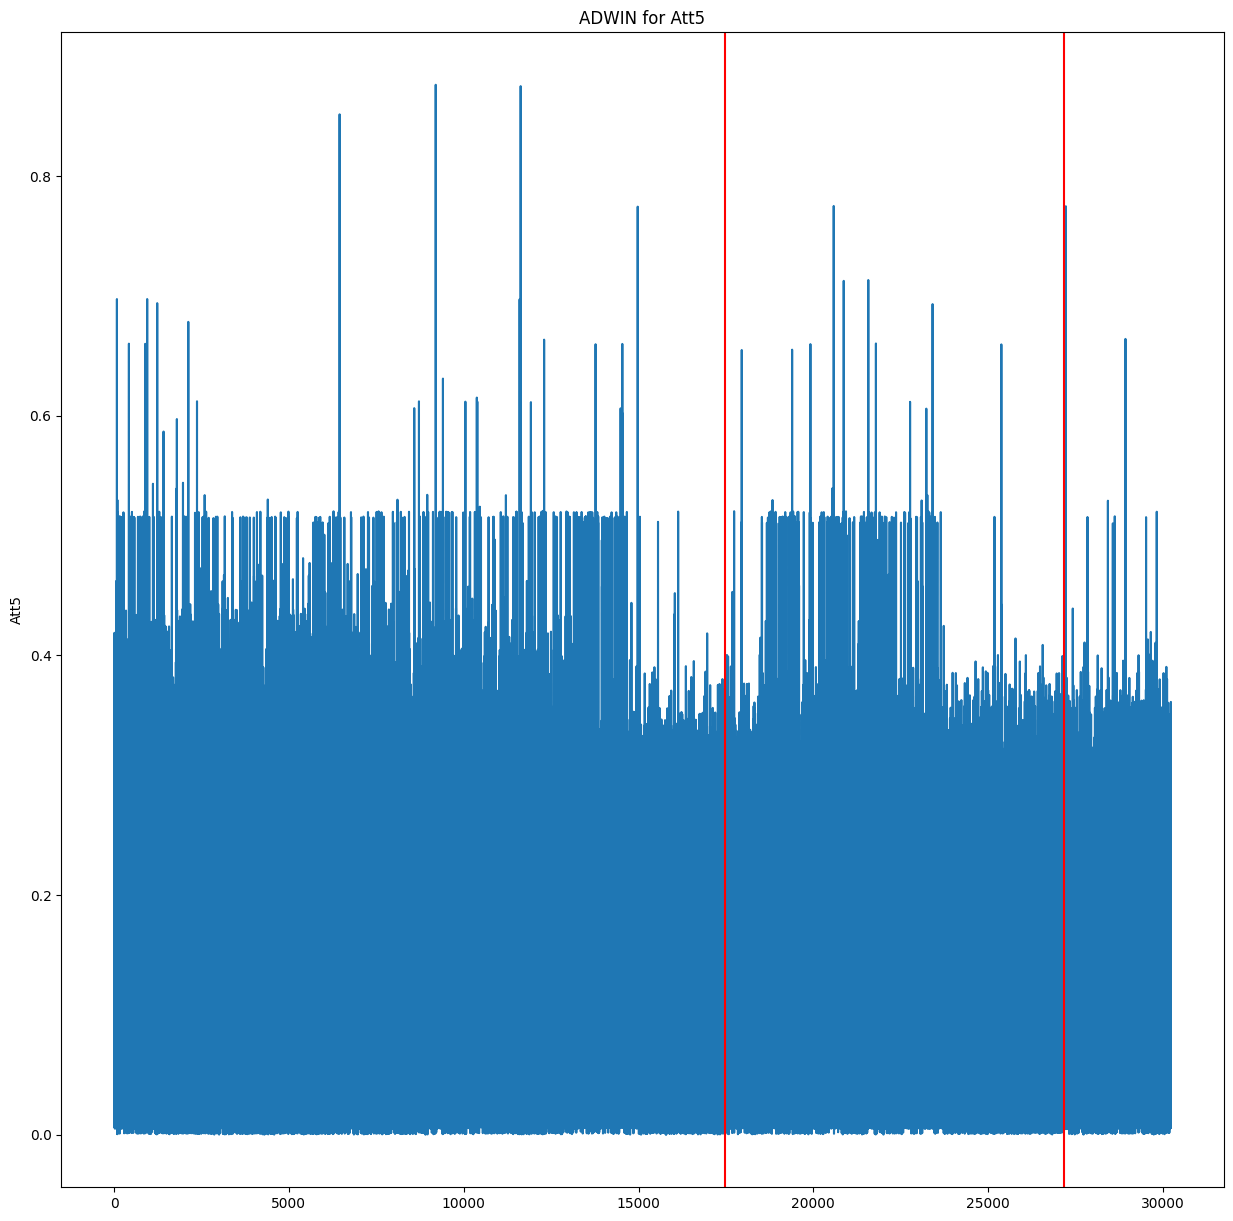

In [80]:
fig=plt.figure(figsize=(15, 15))
att_adwin("Att5")

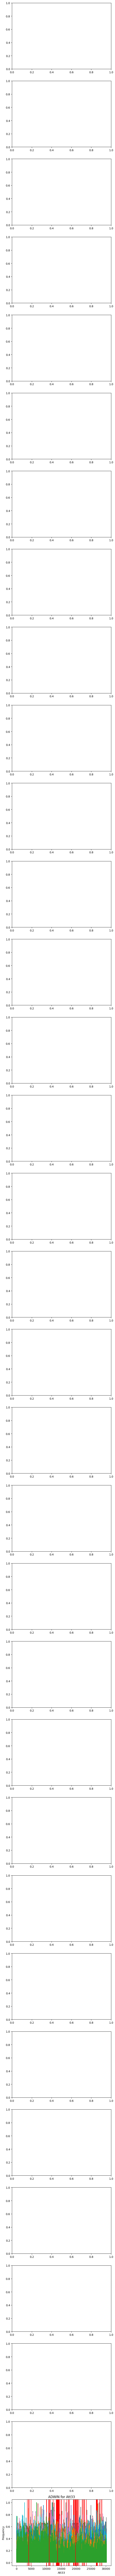

In [75]:
columns = ['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9',
       'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17',
       'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25',
       'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33']


# Calculate the number of rows and columns for subplots
n_rows = len(columns)
n_cols = 1

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 4 * n_rows))

# Loop through each column and create a distribution plot
for i, column in enumerate(columns):
    adwin = drift.ADWIN()
    change_indexes = []
    data_stream = df[column].tolist()
    # Update drift detector and verify if change is detected
    for j, val in enumerate(data_stream):
        _ = adwin.update(val)
        if adwin.drift_detected:
            # print(f"Change detected at index {i}, input value: {val}")
            change_indexes.append(j)
    
    ax = axes[i] if n_rows > 1 else axes  # Handle single-row case
    axes[i] = sns.lineplot(data=df[column])
    axes[i].set_title(f'ADWIN for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    x = axes[i].lines[0].get_xdata()
    y = axes[i].lines[0].get_ydata()
    for change_index in change_indexes:
        plt.axvline(x[change_index], color='red')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

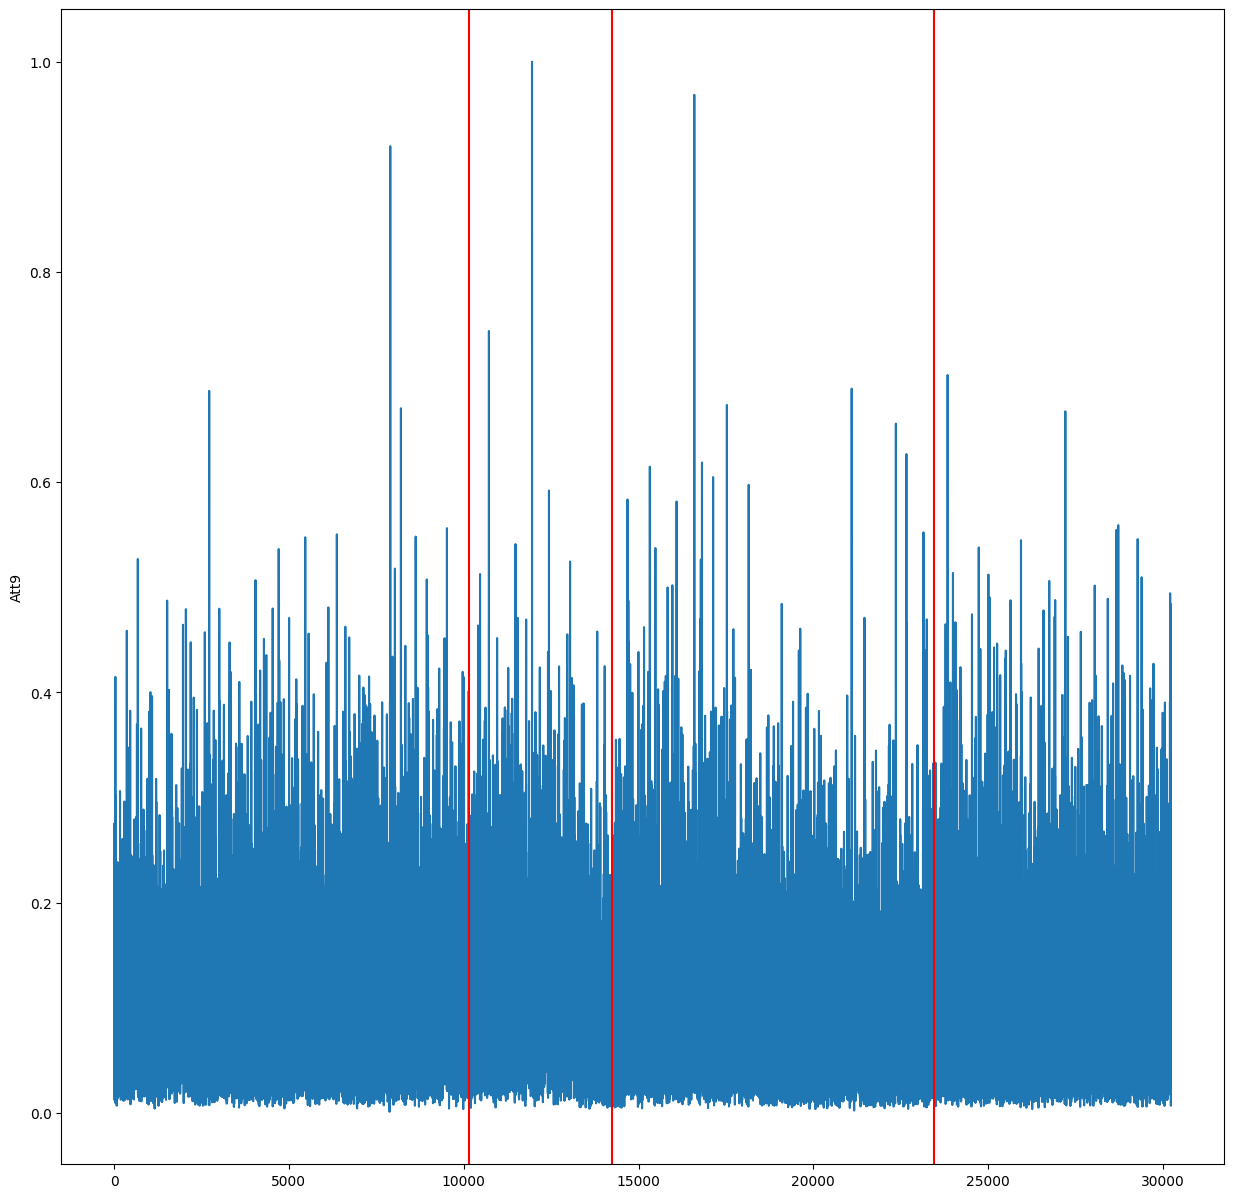

In [58]:




# https://stackoverflow.com/questions/56600828/how-can-i-add-a-vertical-line-to-a-seaborn-dist-plot-where-it-picks
# import seaborn as sns, numpy as np
# sns.set(); np.random.seed(0)
# x = np.random.randn(5000)
# ax = sns.distplot(x, kde = True)
# ax.lines[0].remove()

In [ ]:
# # Simulate a data stream composed by two data distributions
# rng = random.Random(12345)
# data_stream = rng.choices([0, 1], k=1000) + rng.choices(range(4, 8), k=1000)
# data_stream

In [ ]:
https://www.sciencedirect.com/science/article/abs/pii/S0020025518302743